In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve

import scipy.special as sp
from scipy.sparse import diags
import ipywidgets as widgets
from ipywidgets import interact

import scipy.special as sp
import pandas as pd

#from ttim import *
#from pylab import *
%matplotlib inline

In [2]:
def tiptoetracking(zeta, zbot, ztop, L, npor, tipslope, toeslope, tipleft, tipright, 
                   toeleft, toeright, alpha = 0.1, beta = 0.1):
    for i in tipleft:
        if (ztop[i - 1] - zeta[i]) / (0.5 * (L[i - 1] + L[i])) > tipslope:
            delzetamax = 0.5 * (L[i - 1] + L[i]) * tipslope
            delzetai     = alpha * npor[i - 1] * L[i - 1] / (npor[i] * L[i] + npor[i - 1] * L[i - 1]) * delzetamax
            delzetaimin1 = alpha * npor[i] * L[i] / (npor[i] * L[i] + npor[i - 1] * L[i - 1]) * delzetamax

            zeta[i - 1] -= delzetaimin1
            zeta[i] += delzetai
        else:
            delzetamax = 0.5 * (L[i] + L[i+1]) * tipslope
            delzetai     = alpha * npor[i] * L[i] / (npor[i] * L[i] + npor[i + 1] * L[i + 1]) * delzetamax
            if ztop[i] - zeta[i] < delzetai * beta:
                zeta[i+1] -= (ztop[i] - zeta[i]) * npor[i] * L[i] / (npor[i + 1] * L[i + 1])
                zeta[i] = ztop[i]
            
    for i in tipright:
        if (ztop[i + 1] - zeta[i]) / (0.5 * (L[i] + L[i + 1])) > tipslope:
            delzetamax = 0.5 * (L[i] + L[i + 1]) * tipslope
            delzetai = alpha * npor[i + 1] * L[i + 1] / (npor[i] * L[i] + npor[i + 1] * L[i + 1]) * delzetamax
            delzetaiplus1 = alpha * npor[i] * L[i] / (npor[i] * L[i] + npor[i + 1] * L[i + 1]) * delzetamax
            zeta[i] += delzetai
            zeta[i + 1] -= delzetaiplus1
        else:
            delzetamax = 0.5 * (L[i-1] + L[i]) * tipslope
            delzetai = alpha * npor[i] * L[i] / (npor[i - 1] * L[i - 1] + npor[i] * L[i]) * delzetamax
            if ztop[i] - zeta[i] < delzetai * beta:
                #print 'thv=', delzetai * beta, 'tipdepth=', zeta[i]
                zeta[i-1] -= (ztop[i] - zeta[i]) * npor[i] * L[i] / (npor[i - 1] * L[i - 1])
                zeta[i] = ztop[i]
            
    for i in toeleft:
        if ((zeta[i] - zbot[i - 1]) / (0.5 * (L[i - 1] + L[i])) > toeslope): #(i > 1) and 
            delzetamax = 0.5 * (L[i - 1] + L[i]) * toeslope
            delzetai     = alpha * npor[i - 1] * L[i - 1] / (npor[i] * L[i] + npor[i - 1] * L[i - 1]) * delzetamax
            delzetaimin1 = alpha * npor[i] * L[i] / (npor[i] * L[i] + npor[i - 1] * L[i - 1]) * delzetamax
            zeta[i - 1] += delzetaimin1
            zeta[i] -= delzetai
        else:
            delzetamax = 0.5 * (L[i] + L[i + 1]) * toeslope
            delzetai     = alpha * npor[i] * L[i] / (npor[i] * L[i] + npor[i + 1] * L[i + 1]) * delzetamax
            if zeta[i] - zbot[i] < delzetai * beta:
                zeta[i+1] += (zeta[i] - zbot[i]) * npor[i] * L[i]/ (npor[i + 1] * L[i + 1])
                zeta[i] = zbot[i]

    for i in toeright:
        if (zeta[i] - zbot[i + 1]) / (0.5 * (L[i] + L[i + 1])) > toeslope:
            delzetamax = 0.5 * (L[i] + L[i + 1]) * toeslope
            delzetai = alpha * npor[i + 1] * L[i + 1] / (npor[i] * L[i] + npor[i + 1] * L[i + 1]) * delzetamax
            delzetaiplus1 = alpha * npor[i] * L[i] / (npor[i] * L[i] + npor[i + 1] * L[i + 1]) * delzetamax
            zeta[i] -= delzetai
            zeta[i + 1] += delzetaiplus1
        else:
            delzetamax = 0.5 * (L[i -1] + L[i]) * toeslope
            delzetai = alpha * npor[i] * L[i] / (npor[i - 1] * L[i - 1] + npor[i] * L[i]) * delzetamax
            if zeta[i] - zbot[i] < delzetai * beta:
                zeta[i - 1] += (zeta[i] - zbot[i]) * npor[i] * L[i]/ (npor[i - 1] * L[i - 1])
                zeta[i] = zbot[i]
    
    if (zeta[0] != zbot[0]) and (zeta[0] != ztop[0]): #first cell is active
        i = 0
        delzetamax = 0.5 * (L[i] + L[i+1]) * toeslope
        delzetai = alpha * npor[i] * L[i] / (npor[i] * L[i] + npor[i + 1] * L[i + 1]) * delzetamax
        if zeta[i] - zbot[i] < beta * delzetai:
            zeta[i + 1] += (zeta[i] - zbot[i]) * npor[i] * L[i] / (npor[i + 1] * L[i + 1])
            zeta[i] = zbot[i]
        delzetamax = 0.5 * (L[i] + L[i+1]) * tipslope
        delzetai = alpha * npor[i] * L[i] / (npor[i] * L[i] + npor[i + 1] * L[i + 1]) * delzetamax
        if ztop[i] - zeta[i] < beta * delzetai:
            zeta[i+1] -= (ztop[i] - zeta[i]) * npor[i] * L[i] / (npor[i + 1] * L[i + 1])
            zeta[i] = ztop[i]
            
    if np.any(zeta>ztop):
        #print ('zeta above top - correction made')
        zeta[zeta>ztop] = ztop[zeta>ztop]
    if any(zeta<zbot):
        #print ('zeta below bottom - correction made')
        #print (zeta[zeta<zbot],',', np.argwhere(zeta<zbot).flat[:],',')
        zeta[zeta<zbot] = zbot[zeta<zbot]
    return zeta

In [3]:
def fdflowtransient(slfac, ncl, nph, rps, nc, nr, nl, L, W, k, H, Q, Fh, S, n, nus, h0, z0, zb, top, delt, alpha, beta):
    tins = 1500 # total injection phase steps of delt 0.01d (15 day injection)
    Nt = np.array([200, 1498, rps, tins - rps ])
    Nt = np.hstack((0, np.cumsum(Nt)))
    #Flat matrices
    Lf = np.tile(L, (nr,nl,1)).flat
    Wf = np.tile(W[:, np.newaxis], (1, nl, nc)).flat
    T = (k * H).flat
    kf = k.flat[:]
    Hf = H.flat
    nf = n.flat
    #nuf = nu.flat
    h0f = h0.copy().flat
    topf = top.flat
    zbf = zb.flat 
    z0f = z0.copy().flat
    Sf = S.flat
    xe=np.cumsum(L); xs=xe-L; xm=(xe+xs)/2
    cellnumbers = np.arange(nr * nc * nl)
    fixed = cellnumbers[~np.isnan(Fh.flat)]
    # Conductances
    C = 2 * Wf[:-1] * T[:-1] * T[1:] / (T[1:] * Lf[:-1] + T[:-1] * Lf[1:])      # Horizontal
    for la in range(nl-1):
        C[nc*la + nc-1] = 0
    D = 2 * Lf[:-nc] * kf[nc:] * kf[:-nc] / (kf[nc:] * Hf[:-nc] + kf[:-nc] * Hf[nc:])  # Vertical
    Dmat = np.zeros((nl * nr * nc)).flat
    Dmat[:-nc] = -D
    # Matrix and rhs
    A = diags([C, C, D, D], [1, -1, nc, -nc], format='csr')
    #Dm = diags([Dmat, -D], [0, -nc], format = 'csr')
    Havg = (Lf[1:] * Hf[:-1] + Lf[:-1] * Hf[1:]) / (Lf[:-1] + Lf[1:])
    # Empty matrix of heads
    h = [] #np.empty((sum(Nt) + 1, nr, nc))
    z = [] #np.empty((sum(Nt) + 1, nr, nc))
    rstp = []
    stpall = []
    phst = []
    h.append(h0)
    z.append(z0)
    for cl in range(ncl):
        for p in range(nph):
            i = Nt[p]
            while (i<Nt[p+1]):
                alpha = nf[:] * Lf[:] * Wf[:] / delt[p]
                Aalpha = diags(alpha, 0)
                B = Sf[:] * Lf[:]*Wf[:] / delt[p]
                Bm = diags(B, 0, format = 'csr')
                A = A - diags(A.sum(1).flat + B.flat[:] , 0, format='csr')#
                A[fixed, :] = 0
                A[fixed, fixed] = 1
                tipright = []; tipleft = []; toeleft = []; toeright = []; iactive = []; ia1 = []; ia2 = []
                for la in range(nl):
                    strt = (la * nc)
                    end = strt+nc
                    tipright.append(np.where((z0f[strt:end][:-1] < topf[strt:end][:-1]) & (z0f[strt:end][1:] == topf[strt:end][1:]))[0])
                    tipleft.append(np.where((z0f[strt:end][:-1] == topf[strt:end][:-1]) & (z0f[strt:end][1:] < topf[strt:end][1:]))[0] + 1)
                    toeleft.append(np.where((z0f[strt:end][:-1] == zbf[strt:end][:-1]) & (z0f[strt:end][1:] > zbf[strt:end][1:]))[0] + 1)
                    toeright.append(np.where((z0f[strt:end][:-1] > zbf[strt:end][:-1]) & (z0f[strt:end][1:] == zbf[strt:end][1:]))[0])
                    iactive.append((z0f[strt:end] < topf[strt:end]) & (z0f[strt:end] > zbf[strt:end]))
                    ia1.append(min(np.argwhere(iactive[la]==True))) 
                    ia2.append(max(np.argwhere(iactive[la]==True)))
                    iactive[la][ia1[la][0]:ia2[la][0]+1] = True
                #print (i,iactive)
        # Correction made for multilayer
                active_c = []
                for ac in range(nl):
                    #print np.shape(np.argwhere(iactive[ac]==True))
                    active_c.append(np.argwhere(iactive[ac]==True))
                    active_c[ac] = active_c[ac].flat[:]
                #print ('t=', i, np.shape(active_c[0]))
        # Correction made for multilayer
                mask = {}
                for j in range(nl):
                    if (j-1)>=0:
                        mask[str(j)+str(j-1)] = np.isin(active_c[j], active_c[j-1])
                    if (j+1)<nl:
                        mask[str(j)+str(j+1)] = np.isin(active_c[j], active_c[j+1])
                #print (np.shape(mask['01']))
                Hs = z0f[:] - zbf[:]
                Ts = Hs[:] * kf[:]
                doverH = (Lf[:-1] * Hs[1:] + Lf[1:] * Hs[:-1])/(Lf[:-1] + Lf[1:])/Havg
                #print (mask)
                # adjust for tips and toes
                for la in range (nl):
                    doverH[la*nc + tipleft[la] - 1] = 1
                    doverH[la*nc + tipright[la]] = 1
                    doverH[la*nc + toeleft[la] - 1] = 0
                    doverH[la*nc + toeright[la]] = 0

                Cs = doverH * C
                Csmat = diags([Cs, Cs, D, D], [1, -1, -nc, nc], format='csr')
                Csmat1 = diags([D, Dmat], [-nc, 0], format='csr')
                Csm1 = diags(D, -nc, format='csr')
                Csm2 = diags(D, nc, format='csr')
                Csm3 = diags(Csm1.sum(1).flat, 0)
                Asmat = Csmat - diags(Csmat.sum(1).flat, 0)
                Asmat1 = Asmat + Csm3 - Csm2
                rhs = - nus * Asmat1.dot(z0f[:]) + nus * Csmat1.dot(zbf[:]) - Q[p].flat - Bm.dot(h0f[:])
                #-qzh#- Q.flat[:]
                rhs[fixed] = Fh.flat[fixed]
                h0f = spsolve(A, rhs)
                h0f =h0f.copy()
                np.array(h.append(np.reshape(h0f.copy(), (nl, nr, nc))))
        # Correction made for multilayer
                intd = []
                for k in range(nl-1):
                    strt = k*nc
                    end = strt+nc
                    htb = h0f[strt:end] + nus*(z0f[strt:end]-zbf[strt:end])
                    hbt = h0f[end:end+nc]
                    qz = D[strt:end] * (htb - hbt)
                    intd.append(qz)

                #Zeta
                for la in range(nl):
                    z0f = z0f.copy()
                    strt = la*nc
                    end = strt + nc
                    Csactive = Cs[strt:end-1][iactive[la][:-1] & iactive[la][1:]]
                    Csmatz = diags([Csactive, Csactive], [1, -1], format='csr') 
                    Asmatz = Csmatz - diags(Csmatz.sum(1).flat, 0, format='csr')
                    Aalphaz = diags(alpha[strt:end][iactive[la]], 0)
                    Bmatz = nus * Asmatz  - Aalphaz

                    Qs = np.zeros((nr, nc))
                    Qs = Qs.flat[:]
                    Qs[tipright[la]] = -Cs[strt + tipright[la]] * ((h0f[strt + tipright[la]] - h0f[strt + tipright[la]+1]) + 
                                                     nus * (z0f[strt + tipright[la]] - z0f[strt + tipright[la]+1]))

                    # This is source
                    if la < nl-1:
                        qz1 = intd[la][active_c[la]]
                        if len(mask[str(k)+str(k+1)][mask[str(k)+str(k+1)]==True])>0:
                            qz1[qz1<0] = 0

                        Qs[active_c[la]] = Qs[active_c[la]] - qz1

                    #This is sink
                    if la>0:
                        if len(mask[str(la)+str(la-1)][mask[str(la)+str(la-1)]==True])>0:
                            qz2 = intd[la-1][active_c[la]][mask[str(la)+str(la-1)]]
                            qz2[qz2<0] = 0
                            #if la==4 and i<2:
                                #print 't=', i, 'layer=', la
                            Qs[active_c[la][mask[str(la)+str(la-1)]]] = Qs[active_c[la][mask[str(la)+str(la-1)]]] + qz2

                    rhszeta = -Asmatz.dot(h0f[strt:end][iactive[la]]) - Qs[iactive[la]] - Aalphaz.dot(
                        z0f[strt:end][iactive[la]])
                    z0f[strt:end][iactive[la]] = spsolve(Bmatz, rhszeta) 
                    # Toe and tip slope correction
                    midzi = int((ia1[la]+ia2[la])/2)
                    slp = (z0f[strt:end][midzi+1] - z0f[strt:end][midzi-1])/(xm[midzi+1] - xm[midzi-1])
                    toeslope = slp - (slp * slfac)
                    #toeslope = 0.2
                    #if cl==0:
                     #   toeslope = 0.06
                    #if toeslope>2:
                        #toeslope=2
                    #print ('Slope-',toeslope, 'Layer', la)
                    #print 't=', i, 'layer=', la
                    z0f[strt:end] = tiptoetracking(z0f[strt:end], zbf[strt:end], topf[strt:end], 
                                                   Lf[strt:end], nf[strt:end], tipslope, toeslope, tipleft[la], tipright[la], 
                               toeleft[la], toeright[la], alpha=0.1, beta=0.1)
                z.append(np.reshape(z0f.copy(), (nl, nr, nc)))
                    
                #Correction for unwanted spike
                #sp = np.argwhere(z0f==-20.).flat[:]
                #if p==2:
                for la in range(nl):
                    st1 = la*nc
                    en1 = st1 + nc
                    sp = np.argwhere(z0f[st1:en1]==(-10.*la)-10).flat[:] # Searching the cell z0f == Layer bottom
                    if sp.size!=0:
                        z0f[st1:st1+max(sp)+1] = (-10.*la)-10
                #Correction done
                phst.append([cl,p,i])
                trl2=z0f[nc:nc+7]
                trl1=z0f[:7]
                #crt1=trl1-(-10)
                #if cl==0:
                 #   if (p == 2) and (i == Nt[p+1]-1) and (len(trl1[trl1>-10])==0):
                  #      #print (Q[p][0][0])
                   #     rps += 1
                    #    #print ('Recovery steps increased by 1','rps',rps)
                     #   Nt = np.array([200, 1498, rps, tins - rps ])
                      #  Nt = np.hstack((0, np.cumsum(Nt)))
                #if cl>0:
                if (p == 2) and (i == Nt[p+1]-1) and (len(trl2[trl2>-10.1])==0) and (len(trl1[trl1>-9.9])==0):
                    #print (Q[p][0][0])
                    rps += 1
                    #print ('Recovery steps increased by 1','rps',rps)
                    Nt = np.array([200, 1498, rps, tins - rps ])
                    Nt = np.hstack((0, np.cumsum(Nt)))
                i+=1
            print ('phase', p)
        stpall.append(Nt)
        rstp.append(rps)
        print ('cycle ',cl,' finished','rps :', rps, 'Efficiency= ', rps/1500)
    return h, z, rstp, stpall, phst

In [4]:
dels4=50.0*np.ones(238)
dels3=5.0*np.ones(31)
dels2=np.ones(5) 
dels1=0.2*np.ones(3) #for all other model this value is 21
dels=np.hstack((dels1,dels2,dels3,dels4)) # Length of each column segment
nc = len(dels) # number of columns
nr = 1 # Number of rows
nl = 2 # Number of layer
nph = 4 # Number of phase
ncl = 10
L = dels # length of cells along row
W = 1.0 * np.ones((nr))  # length of cells along column

delt = np.array([0.0001, 0.01, 0.01, 0.01]) # Time step duration (day) for each phase
rps = 100 # Recovery phase steps for initial iteration
tind = 15 # Total injection duration in day
ininst = 200 # Initial injection stps
#Nt = np.array([ininst, int((tind - delt[0]*ininst)/delt[1]), rps, int(tind/delt[3])-rps])

xe=np.cumsum(L)
xs=xe-L
xm=(xe+xs)/2
kl = 10.0 # Horizontal hydraulic conductivity
nlp = 0.3 # Porosity
Sl = 1e-5 #* np.ones((nr, nc))
k = kl * np.ones((nl, nr, nc)) # k values of cells
n = nlp * np.ones((nl, nr, nc)) # Effective porosity
S = Sl  * np.ones((nl, nr, nc)) # Storage coefficient

#correction for radial model
for i in range(nc):
    for j in range(nl):
        k[j, 0, i] = xm[i] * 2 * np.pi * k[j, 0, i]
        S[j, 0, i] = xm[i] * 2 * np.pi * S[j, 0, i]
        n[j, 0, i] = xm[i] * 2 * np.pi * n[j, 0, i]
        
        
Hl = 10
H = Hl * np.ones((nl, nr, nc)) # thickness of cells
Q = np.zeros((nph, nl, nr, nc))
Q[0, 0, 0, 0] = 2000.0
Q[1, 0, 0, 0] = 2000.0
Q[2, 0, 0, 0] = -2000.0
Q[3, 0, 0, 0] = 0.0

top = np.zeros((nl, nr, nc))
for i in range(nl):
    top[i,0,:] = -Hl*i
zb = np.zeros((nl, nr, nc))
for i in range(nl):
    zb[i,0,:] = -Hl*(i+1)

nus = 0.025


tinj = 15
D = 2000/(kl * nus * Hl**2 )
tau = kl * nus * tinj/(nlp * Hl)
slfac = tau * tau / D
tipslope = 0.05
toeslope = 0.05
alpha = 0.1
beta = 0.1
h0 = np.zeros((nl, nr, nc))
z0 = np.zeros((nl, nr, nc), dtype = np.float)
z0[1, 0, 0] = -20
z0[1, 0, 1] = -15
z0[1, 0, 2:] = -10
z0[0, 0, :3] = -10
z0[0, 0, 3] = -5
z0[0, 0, 4:] =0
#strt = 0
#intv1 = nl*Hl # Total depth of the model
#intv = 51
#dep = 10
#for i in range(nl):
#    strt += intv1-15
#    z0[nl-i-1][0][strt:strt+intv] = np.linspace(-intv1+(dep*i), -intv1+(dep*(i+1)), intv)
#    z0[nl-i-1][0][:strt] = -intv1+(dep*i)
#    z0[nl-i-1][0][strt+intv:] = -intv1+(dep*(i+1))
Fh = np.full((nl, nr, nc), np.nan) # fixed head cells of cells
Fh[:, 0, -1] = 0

In [5]:
rsltm = fdflowtransient(slfac, ncl, nph, rps, nc, nr, nl, L, W, k, H, Q, Fh, S, n, nus, h0, z0, zb, top, delt, alpha, beta)

/Users/ihasan/anaconda3/lib/python3.7/site-packages/scipy/sparse/compressed.py:746: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


phase 0
phase 1
phase 2
phase 3
cycle  0  finished rps : 861 Efficiency=  0.574
phase 0
phase 1
phase 2
phase 3
cycle  1  finished rps : 1019 Efficiency=  0.6793333333333333
phase 0
phase 1
phase 2
phase 3
cycle  2  finished rps : 1074 Efficiency=  0.716
phase 0
phase 1
phase 2
phase 3
cycle  3  finished rps : 1100 Efficiency=  0.7333333333333333
phase 0
phase 1
phase 2
phase 3
cycle  4  finished rps : 1125 Efficiency=  0.75
phase 0
phase 1
phase 2
phase 3
cycle  5  finished rps : 1142 Efficiency=  0.7613333333333333
phase 0
phase 1
phase 2
phase 3
cycle  6  finished rps : 1157 Efficiency=  0.7713333333333333
phase 0
phase 1
phase 2
phase 3
cycle  7  finished rps : 1174 Efficiency=  0.7826666666666666
phase 0
phase 1
phase 2
phase 3
cycle  8  finished rps : 1176 Efficiency=  0.784
phase 0
phase 1
phase 2
phase 3
cycle  9  finished rps : 1188 Efficiency=  0.792


In [6]:
zetac1=rsltm[1]
rpc1=np.array(rsltm[2])
#Saving results
#%store zetac1
%store rpc1

Stored 'rpc1' (ndarray)


In [ ]:
np.shape(zetac1)

In [ ]:
#Initial volume of fresh water in the system
inivi = np.sum(-np.pi*(xe**2-xs**2)*zetac1[0][0][0])*0.3 +np.sum(-np.pi*(xe**2-xs**2)*(10+zetac1[0][1][0]))*0.3
print ('Initial volume= ', inivi)
print ('Injected volume at each cycle= ', 15*2000)
vca=inivi.copy()
voli =[]
volr =[]
volc =[]
volia =[]
volra =[]
volca =[]
for fg in range(10):
    vi=np.sum(-np.pi*0.3*(xe**2-xs**2)*zetac1[3198*fg+200+1498][0][0])+ np.sum(
        -np.pi*0.3*(xe**2-xs**2)*(10+zetac1[3198*fg+200+1498][1][0]))
    vr=np.sum(-np.pi*0.3*(xe**2-xs**2)*zetac1[3198*fg+200+1498+rpc1[fg]][0][0])+ np.sum(
        -np.pi*0.3*(xe**2-xs**2)*(10+zetac1[3198*fg+200+1498+rpc1[fg]][1][0]))
    vc=np.sum(-np.pi*0.3*(xe**2-xs**2)*zetac1[3198*fg+200+1498+1500][0][0])+ np.sum(
        -np.pi*0.3*(xe**2-xs**2)*(10+zetac1[3198*fg+200+1498+1500][1][0]))
    voli.append(vi)
    volr.append(vr)
    volc.append(vc)
    #Actual volume of fresh water at different phase of each cycle
    res = 30000-(rpc1[fg]*0.01*2000)
    vca += res
    volca.append(np.round(vca,2))
    volia.append(np.round(vca+(rpc1[fg]*0.01*2000),2))
    volra.append(np.round(vca,2))
    print (vr, vc)
voli = np.round(np.array(voli),2)
volr = np.round(np.array(volr),2)
volc = np.round(np.array(volc),2)
dtf = {'After Inj':voli, 'Actual Vol_i':volia, 'Err_1':np.round((voli-volia)*100/volia,3),
       'After Rec':volr, 'Actual Vol_r':volra, 'Err_2':np.round((volr-volra)*100/volra,3),
       'Cycle end':volc, 'Actual Vol_c':volca, 'Err_3':np.round((volc-volca)*100/volca,3)}
err = pd.DataFrame(dtf)
print (err)

In [6]:
#importing result from MODFLOW double layer model
%store -r zetas
%store -r rcstps
%store -r x

In [11]:
#importing result of single layer model (new)
%store -r zetac
%store -r xm
%store -r rpc

In [7]:
cycp = [1, 5, 10]

In [16]:
print(np.shape(zetac))
print (rpc[0])

(31981, 1, 1, 291)
641


In [ ]:
print (np.shape(rsltm[1]))
print (np.shape(zetas))
print (rsltm[2])
print (rcstps)

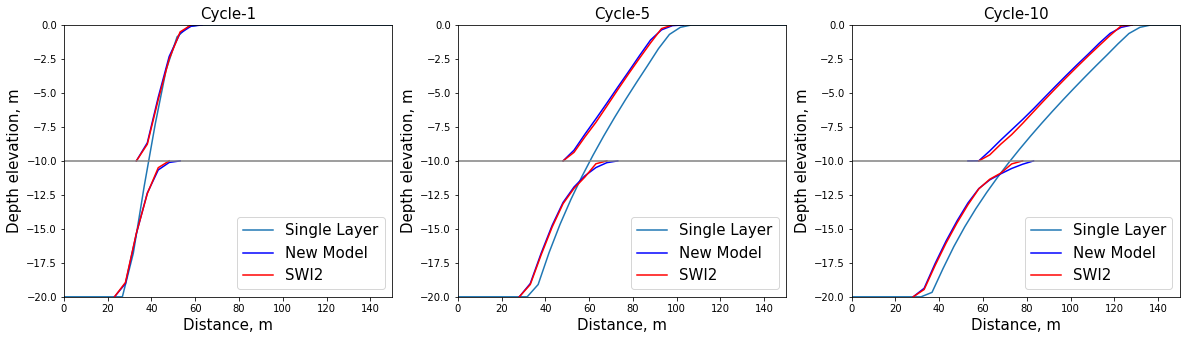

In [20]:
plt.figure(figsize=(20, 5))
for i in range(3):
    nmz1 = rsltm[1][(3198*(cycp[i]-1))+1698][0][0].copy()
    arn1 = np.argwhere((nmz1>-10) & (nmz1<0))[:,0]
    
    nmz2 = rsltm[1][(3198*(cycp[i]-1))+1698][1][0].copy()
    arn2 = np.argwhere((nmz2>-20) & (nmz2<-10))[:,0]
    
    swz1 = zetas[cycp[i]-1][1697][0][0].copy()
    ars1 = np.argwhere((swz1>-10) & (swz1<0))[:,0]
    
    swz2 = zetas[cycp[i]-1][1697][1][0].copy()
    ars2 = np.argwhere((swz2>-19.5) & (swz2<-10))[:,0]
    #print (swz2)
    plt.subplot(1,3,i+1)
    plt.plot(xm, zetac[(3198*(cycp[i]-1))+1698][0][0], label='Single Layer')
    plt.plot(x[arn1[0]-1:arn1[-1]+2], nmz1[arn1[0]-1:arn1[-1]+2], color='blue', label='New Model')
    plt.plot(x[arn2[0]-1:arn2[-1]+2], nmz2[arn2[0]-1:arn2[-1]+2], color='blue')
    plt.plot(x[ars1[0]-1:ars1[-1]+2], swz1[ars1[0]-1:ars1[-1]+2], color='red', label='SWI2')
    plt.plot(x[ars2[0]-1:ars2[-1]+2], swz2[ars2[0]-1:ars2[-1]+2], color='red')
    plt.xlim(0,150)
    plt.xlabel('Distance, m', fontsize=15)
    plt.ylabel('Depth elevation, m', fontsize=15)
    plt.legend(loc='lower right', fontsize=15)
    plt.title('Cycle-{}'.format(cycp[i]), fontsize=15)
    plt.ylim(-20,0)
    plt.axhline(-10, color='gray')
    #fname = '/Users/ihasan/Downloads/Paper_efficiency/Figure_comparing_all_model/Double_layer_Model/Injection Cycle-{}.png'.format(cycp[i])
    #plt.savefig(fname)
    #plt.show()
fname = '/Users/ihasan/Downloads/Paper_efficiency/Figure_comparing_all_model/Double_layer_Model/Injection_w1.png'
plt.savefig(fname)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]


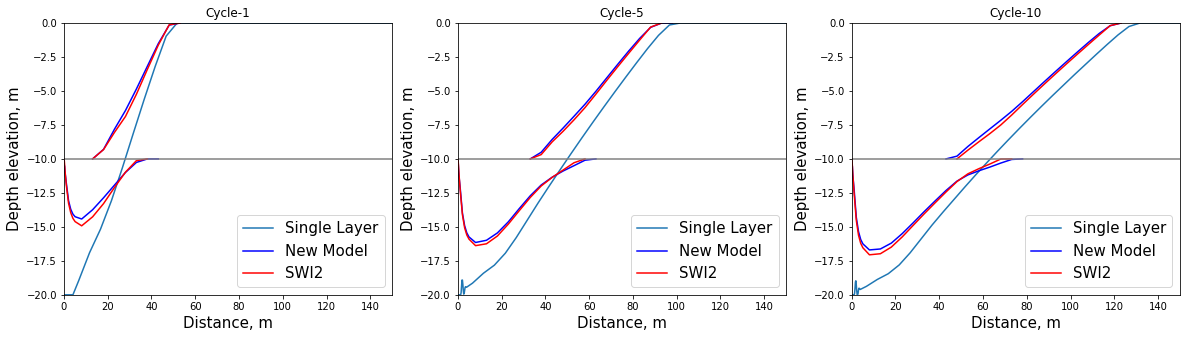

In [23]:
plt.figure(figsize=(20, 5))
for i in range(3):
    nmzr1 = rsltm[1][(3198*(cycp[i]-1))+1698+rsltm[2][cycp[i]-1]][0][0].copy()
    arnr1 = np.argwhere((nmzr1>-10) & (nmzr1<0))[:,0]
    
    nmzr2 = rsltm[1][(3198*(cycp[i]-1))+1698+rsltm[2][cycp[i]-1]][1][0].copy()
    arnr2 = np.argwhere((nmzr2>-20) & (nmzr2<-10))[:,0]
    
    swzr1 = zetas[cycp[i]-1][1697+rcstps[cycp[i]-1]][0][0].copy()
    arsr1 = np.argwhere((swzr1>-10) & (swzr1<0))[:,0]
    
    swzr2 = zetas[cycp[i]-1][1697+rcstps[cycp[i]-1]][1][0].copy()
    arsr2 = np.argwhere((swzr2>-19.5) & (swzr2<-10))[:,0]
    if i==1:
        print(arnr2)
    plt.subplot(1,3,i+1)
    plt.plot(xm, zetac[(3198*(cycp[i]-1))+1698+rpc[cycp[i]-1]][0][0], label='Single Layer')
    plt.plot(x[arnr1[0]-1:arnr1[-1]+2], nmzr1[arnr1[0]-1:arnr1[-1]+2], color='blue', label='New Model')
    plt.plot(x[arnr2[0]:arnr2[-1]+2], nmzr2[arnr2[0]:arnr2[-1]+2], color='blue')
    plt.plot(x[arsr1[0]-1:arsr1[-1]+2], swzr1[arsr1[0]-1:arsr1[-1]+2], color='red', label='SWI2')
    plt.plot(x[arsr2[0]-1:arsr2[-1]+2], swzr2[arsr2[0]-1:arsr2[-1]+2], color='red')
    plt.xlim(0,150)
    plt.ylim(-20, 0)
    plt.xlabel('Distance, m', fontsize=15)
    plt.ylabel('Depth elevation, m', fontsize=15)
    plt.legend(loc='lower right', fontsize=15)
    plt.axhline(-10, color='gray')
    plt.title('Cycle-{}'.format(cycp[i]))
    #fname = '/Users/ihasan/Downloads/Paper_efficiency/Figure_comparing_all_model/Double_layer_Model/Recovery Cycle-{}.png'.format(cycp[i])
    #plt.savefig(fname)
    #plt.show()
fname = '/Users/ihasan/Downloads/Paper_efficiency/Figure_comparing_all_model/Double_layer_Model/Recovery_w1.png'.format(cycp[i])
plt.savefig(fname)

In [ ]:
for i in range(ncl):
    rp1 = rsltm[2][i]
    plt.figure(figsize=(25,2.5))
    plt.plot(xm, rsltm[1][3198*i+1698][0][0])
    plt.plot(xm, rsltm[1][3198*i+1698][1][0])
    plt.plot(xm, rsltm[1][3198*i+1698+rp1][0][0])
    plt.plot(xm, rsltm[1][3198*i+1698+rp1][1][0])
    plt.xlim(0, 150)
    plt.title('Cycle-{}'.format(i+1))

In [ ]:
rp1 = rsltm[2][0]
rsltm[1][1698+rp1][0][0]

In [ ]:
Nt = np.array([200, 1498, 25, 1500-25])
def plotting(tstp=0):
    plt.figure(figsize=(20,10))
    plt.plot(xm, rsltm[1][tstp][0][0],'red')
    plt.xlim(0, 150)
interact(plotting,tstp=(0,np.shape(rsltm[1])[0]));

In [ ]:
cps = rsltm[4] # Cycle, Phase, Step
cd = rsltm[3] # Cycle wise step of each phase
rpc = rsltm[2] # Recovery phase step of each cycle

In [ ]:
print (rpc)

In [ ]:
print (np.shape(rsltm[1]))

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(rsltm[1][1698+431][0][0])
plt.xlim(0,150)

In [ ]:
me1=np.array(rcstps)/15

In [ ]:
me2=np.array(rsltm[2])/15

In [ ]:
me2

In [ ]:
cycl = [1, 5, 10]
for i in range(3):
    print (np.round(me1[cycl[i]-1]), np.round(me2[cycl[i]-1]))

In [ ]:
for i in range(10):
    print (me2[i])